<a href="https://colab.research.google.com/github/javohir-ergashboyev/DL-projects/blob/main/IsCat_DeepLearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from fastai.vision.all import *
from ipywidgets import widgets

In [3]:
path=untar_data(URLs.PETS)/'images'

In [26]:
def is_cat(x): return x[0].isupper()

In [27]:
# # Debugging prints
# image_files = get_image_files(path)
# print("Image files:", image_files[:2])  # Print the first 5 image file paths

# # Verify the label function on sample data
# sample_image_path = image_files[0]
# print(sample_image_path)
# print("Label for sample image:", is_cat(sample_image_path))

# # Create ImageDataLoaders
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)


In [28]:
learn=cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 158MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.160983,0.023912,0.993234,00:48


epoch,train_loss,valid_loss,accuracy,time
0,0.078339,0.016237,0.993911,00:50
1,0.031352,0.006435,0.998647,00:51


In [33]:
upload=widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is Cat: True
Accuracy: 1.000


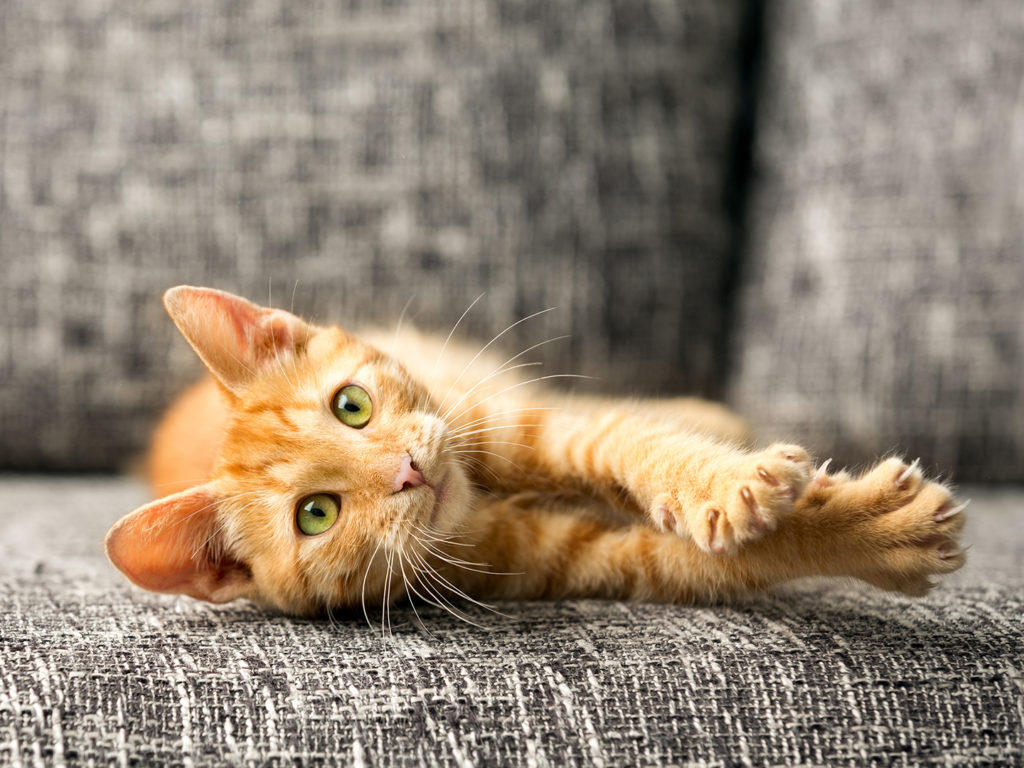

In [36]:
image=PILImage.create(upload.data[-1])
res,_,prob=learn.predict(image)
print(f'Is Cat: {res}')
print(f'Accuracy: {prob[1].item():.3f}')
image